In [1]:
#general imports for data actions
import pandas as pd
import numpy as np
import math
from sklearn import metrics
from sklearn import preprocessing

#for visualization
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [19]:
#df = pd.read_csv('C:/Users/dansi/OneDrive/Документы/Files/Data science/CSGO_project/CSGO/Data/csgo_round_snapshots.csv')
df = pd.read_csv('C:/Users/dansi/OneDrive/Документы/Files/Data science/CSGO_project/CSGO/Data/CSGO_raw.csv')

In [20]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [21]:
df.isnull().sum() # finding nulls

time_left                    0
ct_score                     0
t_score                      0
map                          0
bomb_planted                 0
                            ..
ct_grenade_molotovgrenade    0
t_grenade_molotovgrenade     0
ct_grenade_decoygrenade      0
t_grenade_decoygrenade       0
round_winner                 0
Length: 97, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='round_winner', ylabel='count'>

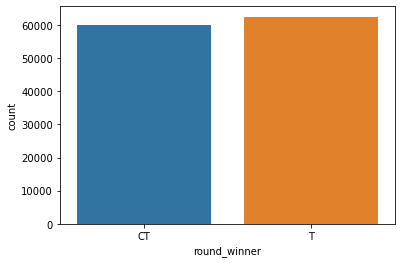

In [22]:
sns.countplot(df['round_winner'])

In [23]:
col = df.columns

In [24]:
# checking for columns for only one value
t=[]
for i in col:
    t.append(df[i].nunique())

In [25]:
# all the columns with only one value
temp =[]
for i in range(len(t)):
    if t[i]==1:
        temp.append(i)
        print(i)

22
30
37
52
58
60


In [26]:
df.drop([col[22], col[30], col[37], col[52], col[58], col[60]], axis = 1, inplace = True) # dropping those columns
print(col[22])
print(col[30])
print(col[37])
print(col[52])
print(col[58])
print(col[60])

ct_weapon_bizon
ct_weapon_g3sg1
t_weapon_m249
ct_weapon_negev
ct_weapon_r8revolver
ct_weapon_sawedoff


In [27]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [28]:
# "de_dust2"    "de_mirage"   "de_nuke"     "de_inferno"  "de_overpass" "de_vertigo"  "de_train"    "de_cache" 
label_encoder = preprocessing.LabelEncoder() 
df['map'] = label_encoder.fit_transform(df['map'])

In [29]:
# bomb planted = 1, bomb not planted = 0
df['bomb_planted'] = label_encoder.fit_transform(df['bomb_planted'])

In [30]:
# Counter-Terrorists round winner = 0, Terrorists round winner = 1
df['round_winner'] = label_encoder.fit_transform(df['round_winner'])

In [31]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [32]:
df_describe = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,14,15,90]]

In [51]:
df_describe.describe().loc[['mean','std','min','25%','50%','75%','max',]].T.round(decimals=4)

,mean,std,min,25%,50%,75%,max
time_left,97.8869,54.4652,0.01,54.92,94.91,166.9175,175.0
ct_score,6.7092,4.7904,0.00,3.00,6.00,10.0000,32.0
t_score,6.7804,4.8235,0.00,3.00,6.00,10.0000,33.0
map,3.5202,1.9291,0.00,2.00,3.00,5.0000,7.0
bomb_planted,0.1118,0.3151,0.00,0.00,0.00,0.0000,1.0
ct_health,412.1066,132.2933,0.00,350.00,500.00,500.0000,500.0
t_health,402.7145,139.9190,0.00,322.00,500.00,500.0000,600.0
ct_armor,314.1421,171.0297,0.00,194.00,377.00,486.0000,500.0
t_armor,298.4447,174.5765,0.00,174.00,334.00,468.0000,500.0
ct_money,9789.0238,11215.0423,0.00,1300.00,5500.00,14600.0000,80000.0


In [34]:
#df.to_csv(r'desktop/CSGO_cleaned.csv')